Some important notes:
On linear Regression we try to fit a line between data points to satisfy data points. We try to minimize the cost function(sum of squart of errors). We'll find the perfect line by using some formulas:
x^(i) = i'th value of x
y^(i) = i'th value of y
for ex: x represents house square ; y represents house price
m = number of data points
f w,b (x) = wx + b -> Linear Regression Model
J(w,b) = 1/2m * sum(∑)[i=1 to m, (f w,b(x^(i)) - y^(i) )^2] -> Cost function

Gradient descent algorithm: To find the minimum value (can give different answers(local min values) on complex functions)
{Repeat until convergence
    w --> w - α * d^^/d^^(w) * J(w,b) 
                  ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
                  1/m * sum(∑)[i=1 to m, (f w,b(x^(i)) - y^(i))*x^(i)]
    b --> b - α * d^^/d^^(b) * J(w,b)
                  ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
                  1/m * sum(∑)[i=1 to m, f w,b(x^(i)) - y^(i)]
}
Symbol meanings:
    (-->) new value of {left} is {right}    
    (d^^) patrial derivative


Some important notes:
On linear Regression we try to fit a line between data points to satisfy data points. We try to minimize the cost function(sum of squart of errors). We'll find the perfect line by using some formulas:
x^(i) = i'th value of x
y^(i) = i'th value of y
for ex: x represents house square ; y represents house price
m = number of data points
f w,b (x) = wx + b -> Linear Regression Model
J(w,b) = 1/2m * sum(∑)[i=1 to m, (f w,b(x^(i)) - y^(i) )^2] -> Cost function

Gradient descent algorithm: To find the minimum value (can give different answers(local min values) on complex functions)
{Repeat until convergence
    w --> w - α * d^^/d^^(w) * J(w,b) 
                  ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
                  1/m * sum(∑)[i=1 to m, (f w,b(x^(i)) - y^(i))*x^(i)]
    b --> b - α * d^^/d^^(b) * J(w,b)
                  ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
                  1/m * sum(∑)[i=1 to m, f w,b(x^(i)) - y^(i)]
}
Symbol meanings:
    (-->) new value of {left} is {right}    
    (d^^) patrial derivative


On this project we will make a house prediction module with one feature.

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Creating a tiny dataset, each row reperesents a data point and first value of each row, represents house spuare(in term of a thousands feet) and secound one represents house price(a thousands $).
tiny_dataset = np.array([[1.0, 211] , [2.1, 420],
                         [1.2, 231] , [2.5, 500],
                         [1.4, 410] , [2.8, 550],
                         [1.6, 380] , [3.0, 530],
                         [1.9, 400] , [3.4, 600]])
print(tiny_dataset)

[[  1.  211. ]
 [  2.1 420. ]
 [  1.2 231. ]
 [  2.5 500. ]
 [  1.4 410. ]
 [  2.8 550. ]
 [  1.6 380. ]
 [  3.  530. ]
 [  1.9 400. ]
 [  3.4 600. ]]


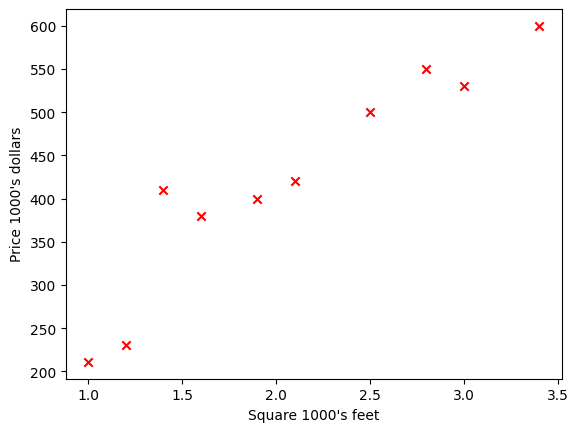

In [95]:
for i in tiny_dataset:
    plt.scatter(i[0],i[1], marker='x', c='r')
#plt.plot([1, 3.5], [155+96, 3.5*155+96], color='blue', linestyle='-')  #Example line
# We will calculate the best fit line next block
plt.xlabel("Square 1000's feet")
plt.ylabel("Price 1000's dollars")
plt.show()

In [96]:
# Give the first values of w and b (Generally starts from 0)
# We'll use vectors also but now.
# On that code we can clearly determine best fit line, but we also need to determine alpha and t range manually, on next code we will calculate t range
w = 0
b = 0
alpha = 0.01
m = len(tiny_dataset)

for t in range(2000):
    sumw = 0
    sumb = 0
    for i in range(m):
        sumw += ((w * tiny_dataset[i][0] + b) - tiny_dataset[i][1]) * tiny_dataset[i][0]   #f(x^(i))
        sumb += (w * tiny_dataset[i][0] + b) - tiny_dataset[i][1]   #f(x^(i))
    w -= sumw / m * alpha
    b -= sumb / m * alpha

print(w,b)

151.40866769864164 106.2237156719538


In [97]:
# On that part we will calculate t range, but how. First our target is find the convergence w and b so if they are change really really small on steps,
# We can stop the loop because that means we are really close them.
w = 0
b = 0
alpha = 0.1
m = len(tiny_dataset)
steps = 0
while True:
    tmpw = w
    tmpb = b
    sumw = 0
    sumb = 0
    for i in range(m):
        sumw += ((w * tiny_dataset[i][0] + b) - tiny_dataset[i][1]) * tiny_dataset[i][0]   #f(x^(i))
        sumb += (w * tiny_dataset[i][0] + b) - tiny_dataset[i][1]   #f(x^(i))
    tmpw -= sumw / m * alpha
    
    tmpb -= sumb / m * alpha

    # Escape condition
    if w / tmpw < 1.0001 and w / tmpw > 0.9999:
        if b / tmpb < 1.0001 and b / tmpb > 0.9999:
            break
    w = tmpw
    b = tmpb
    steps += 1
print("w =",w)
print("b =",b)
print(f"{steps} steps to reach")
# As you can see we can reach really really close values by taking 58 steps, if we need more certain values we can decrease the error intervals

w = 149.61864105999686
b = 110.38746095124779
354 steps to reach


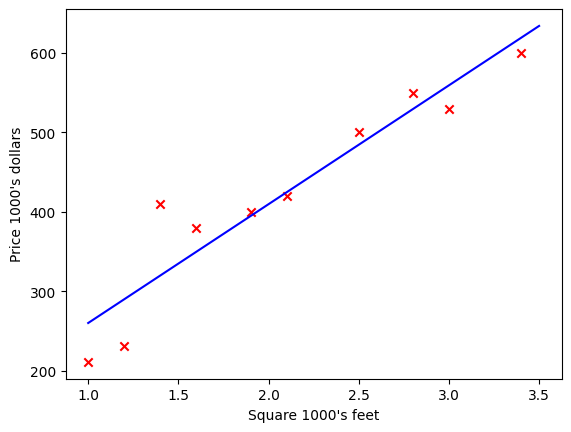

In [98]:
# Finalize program and plotting graph
for i in tiny_dataset:
    plt.scatter(i[0],i[1], marker='x', c='r') # If you keep x and y values seperately and if all x es and y es all together, you can directly write tiny_dataset.. 
plt.plot([1, 3.5], [w*1+b, w*3.5+b], color='blue', linestyle='-')  #Best fit line
plt.xlabel("Square 1000's feet")
plt.ylabel("Price 1000's dollars")
plt.show()

### Ensuring gradient algorithm by using cost function
 We will plot a graph y= J(w,b) x = #iterations(each step to reach convergance w and b).
 
 On the upper part we coded just reach to taget instead of defining seperated functions. Thus, on this part we will seperately code each function then, plot our graph.

Also we need to make our dataset more handful. 

In [99]:
# We create 2 vectors named x and y
x = np.array([1.0,1.2,1.4,1.6,1.9,2.1,2.5,2.8,3.0,3.4])
y = np.array([211,231,410,380,400,420,500,550,530,600])

In [100]:
# Defining f_wb(x) function
def f_wb (x, w, b): # All scalers
    return w * x + b

In [101]:
#Defining J(w,b) function (cost function)
def cost_function(x, y, w, b): # x and y are vectors, w and b are scalers
    # Returns 1 scaler
    m = len(x)
    tmp_sum = 0
    for i in range(m):
        tmp_sum += (f_wb(x[i],w,b) - y[i])**2
    return tmp_sum / (2*m)

In [102]:
def gradient_compute(x, y, w, b):# x and y are vectors, w and b are scalers 
    # Return 2 scalers
    dj_dw = 0
    dj_db = 0
    m = len(x)
    
    sumw = 0
    sumb = 0
    for i in range(m):
        sumw += (f_wb(x[i],w,b) - y[i]) * x[i]
        sumb += (f_wb(x[i],w,b) - y[i])
        
    dj_dw = sumw / m
    dj_db = sumb / m
    return dj_dw, dj_db

In [103]:
def gradient_descent (x, y, w, b, alpha = 0.01):# x and y are vectors, w, b and alpha are scalers 
    # Returns 2 scalers
    while True:
        tmpw = w
        tmpb = b
        dj_dw, dj_db = gradient_compute(x, y, w, b) 
        tmpw -= alpha * dj_dw
        tmpb -= alpha * dj_db
        
        if w / tmpw < 1.00001 and w / tmpw > 0.99999:
            if b / tmpb < 1.00001 and b / tmpb > 0.99999:
                break
        w = tmpw
        b = tmpb
    return w, b

In [104]:
initial_w = 0
initial_b = 0
w, b = gradient_descent(x, y, initial_w, initial_b)
print(f"w =",w,"\nb =",b)

w = 149.62161083310724 
b = 110.3805530212193


Sketching the best fit line


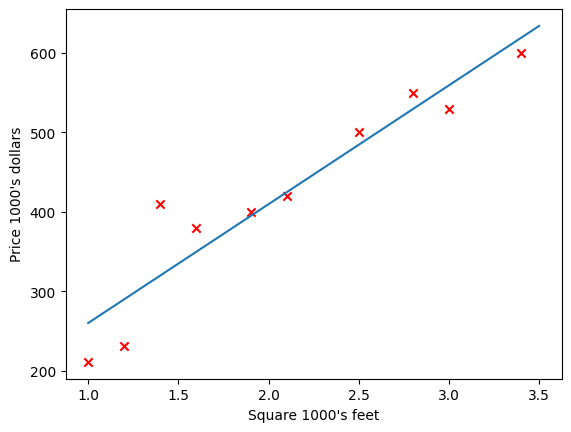

In [105]:
plt.scatter(x, y, marker='x', c='r')
plt.plot([1.0,3.5],[1.0*w+b,3.5*w+b])
plt.xlabel("Square 1000's feet")
plt.ylabel("Price 1000's dollars")
plt.show()

#### Time to sketch J(x,y) , #iteration graph
First define a function for it

In [106]:
def cost_iter_graph(x, y, w, b, num_iterations = 500, alpha = 0.01): # x and y are vecors, w,b,num_iterations and alpha is scalers
    # Return 2 arrays First for x cordinates , second for y cordinates
    points_x = np.arange(num_iterations)
    points_y = np.zeros(num_iterations)
    for j in range(num_iterations):
        # Calculate J(w,b) and put it in y point array
        points_y[j] = cost_function(x,y,w,b)
        
        # Update w and b values
        # To do that we need to go 1 step further by using gradient formula
        dj_dw , dj_db = gradient_compute(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
    return points_x, points_y

Plotting Time: Tere are different graph perspectives, getting by using different alpha and iteration number 

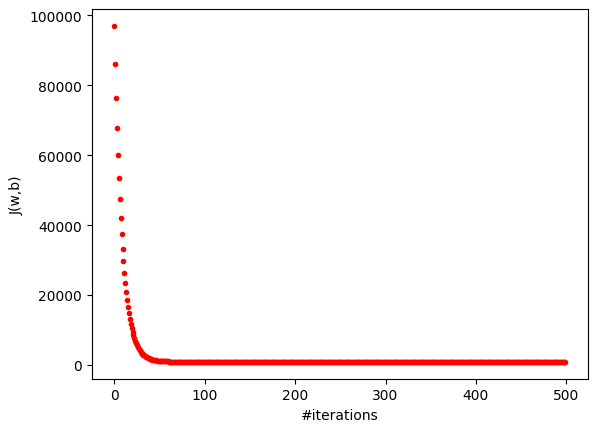

In [107]:
init_w = 0
init_b = 0
points_x, points_y = cost_iter_graph(x, y, init_w, init_b)
plt.scatter(points_x, points_y,marker='.', c='r')
plt.ylabel("J(w,b)")
plt.xlabel("#iterations")
plt.show()

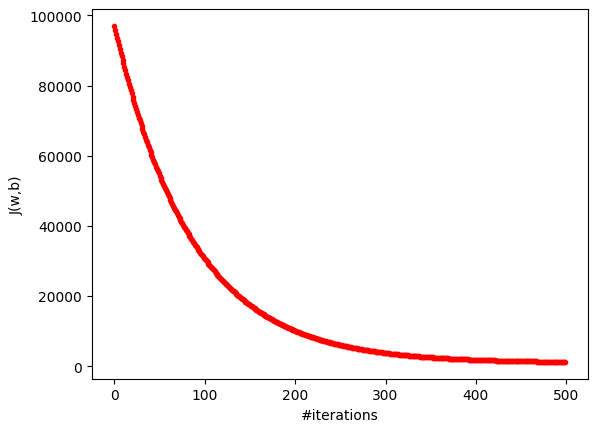

In [108]:
points_x, points_y = cost_iter_graph(x, y, init_w, init_b, alpha=0.001)
plt.scatter(points_x, points_y,marker='.', c='r')
plt.ylabel("J(w,b)")
plt.xlabel("#iterations")
plt.show()

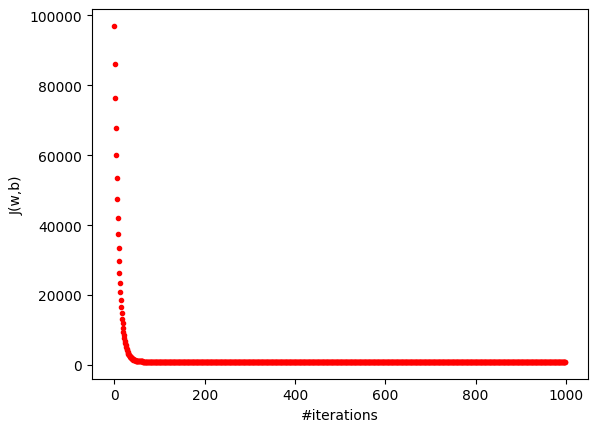

In [109]:
points_x, points_y = cost_iter_graph(x, y, init_w, init_b, num_iterations=1000)
plt.scatter(points_x, points_y,marker='.', c='r')
plt.ylabel("J(w,b)")
plt.xlabel("#iterations")
plt.show()

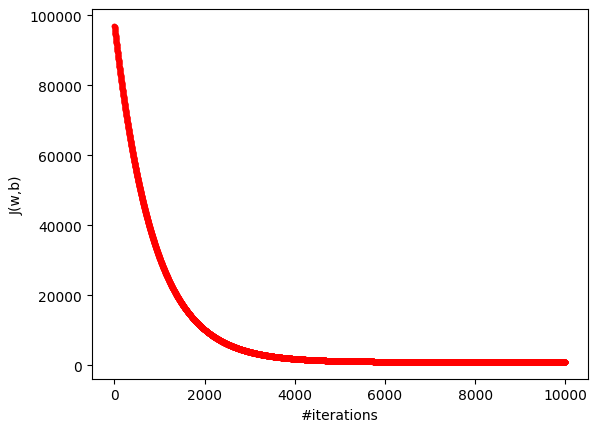

In [110]:
points_x, points_y = cost_iter_graph(x, y, init_w, init_b, num_iterations=10000, alpha=0.0001)
plt.scatter(points_x, points_y,marker='.', c='r')
plt.ylabel("J(w,b)")
plt.xlabel("#iterations")
plt.show()